# **Import Libraries and modules**

# Using the Libraries and importing classes to run the code

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


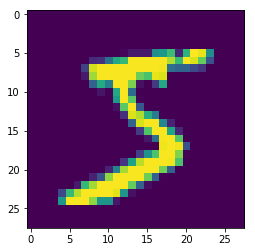

In [24]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Building the model
Here, using sequential model and dropout layer in between hidden layers.

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))#3
#model.add(Dropout(0.3))
model.add(Convolution2D(32, (3, 3), activation='relu'))#5
model.add(MaxPooling2D(pool_size=(2, 2)))#10
model.add(Convolution2D(10, 1, activation='relu'))#10
#model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation='relu'))#12
model.add(MaxPooling2D(pool_size=(2, 2)))#24
#model.add(Dropout(0.1))
model.add(Convolution2D(10, 1))#, activation='relu'))#24
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation='relu'))#26
model.add(Dropout(0.2))
model.add(Convolution2D(12, (3, 3), activation='relu'))#28
#model.add(Dropout(0.1))
#model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 1))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        330       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        2912      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 10)          330       
__________

# Model Compilation

Loss Function --> Categorical cross entropy

Optimizer --> Adam

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Fitting Model

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=0)
model.fit(X_train, Y_train, batch_size=64, nb_epoch=10, verbose=0)
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=0)
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=0)
model.fit(X_train, Y_train, batch_size=64, nb_epoch=10, verbose=0)
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/10
 2816/60000 [>.............................] - ETA: 3s - loss: 0.0245 - acc: 0.9915

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


60000/60000 [==============================] - 4s 61us/step - loss: 0.0124 - acc: 0.9957
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0106 - acc: 0.9962
Epoch 3/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0110 - acc: 0.9965
Epoch 4/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0102 - acc: 0.9967
Epoch 5/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0117 - acc: 0.9961
Epoch 6/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0119 - acc: 0.9961
Epoch 7/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0113 - acc: 0.9961
Epoch 8/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0128 - acc: 0.9959
Epoch 9/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0109 - acc: 0.9962
Epoch 10/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0120 - acc: 0.9957


# Model Evaluation

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.021088650812465495, 0.9943]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[2.3498107e-17 1.3089417e-14 5.0914353e-11 1.6093760e-09 4.3891913e-15
  6.4891771e-16 4.5190096e-23 1.0000000e+00 5.9310704e-15 9.0823399e-10]
 [1.0497125e-13 8.1615257e-09 1.0000000e+00 1.7824311e-11 5.6659910e-15
  9.6799539e-16 6.0948032e-14 1.0567079e-12 1.2938841e-11 1.0841111e-16]
 [2.3973110e-15 1.0000000e+00 9.0418063e-14 4.9878389e-14 1.9040217e-08
  1.7942330e-11 1.4453892e-13 6.6616126e-09 8.7411209e-13 1.0980115e-10]
 [9.9997783e-01 6.7472772e-10 1.7110764e-09 3.9681997e-10 5.3002736e-10
  4.0904133e-08 2.1961692e-05 1.8591591e-10 1.4390012e-08 5.0734446e-08]
 [5.3571929e-15 1.4249912e-12 3.3148238e-11 9.9004735e-13 1.0000000e+00
  2.8694919e-10 2.1887271e-10 8.1688843e-11 3.6365636e-10 2.5420958e-08]
 [3.5046129e-18 9.9999988e-01 4.2061135e-14 9.4752515e-16 5.1008225e-08
  2.4160153e-12 1.2815644e-14 1.3718233e-08 4.3997816e-13 1.2151977e-10]
 [1.5405651e-20 5.2026394e-15 1.0808907e-15 4.9408051e-19 1.0000000e+00
  5.0304335e-13 2.5545639e-15 3.4809093e-11 2.8100486e-10 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7ff164f70ba8>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7ff1658fb208>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7ff1658fb3c8>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7ff1658fb710>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7ff1658fb8d0>,
 'conv2d_5': <keras.layers.convolutional.Conv2D at 0x7ff165053240>,
 'conv2d_6': <keras.layers.convolutional.Conv2D at 0x7ff165014f98>,
 'conv2d_7': <keras.layers.convolutional.Conv2D at 0x7ff16503da90>,
 'conv2d_8': <keras.layers.convolutional.Conv2D at 0x7ff16503d048>,
 'dropout_1': <keras.layers.core.Dropout at 0x7ff165014c18>,
 'dropout_2': <keras.layers.core.Dropout at 0x7ff165064da0>,
 'flatten_1': <keras.layers.core.Flatten at 0x7ff164f97da0>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x7ff16509df60>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x7ff165064160>}

# Showcasing the what kernel is extracting at each filter stage.

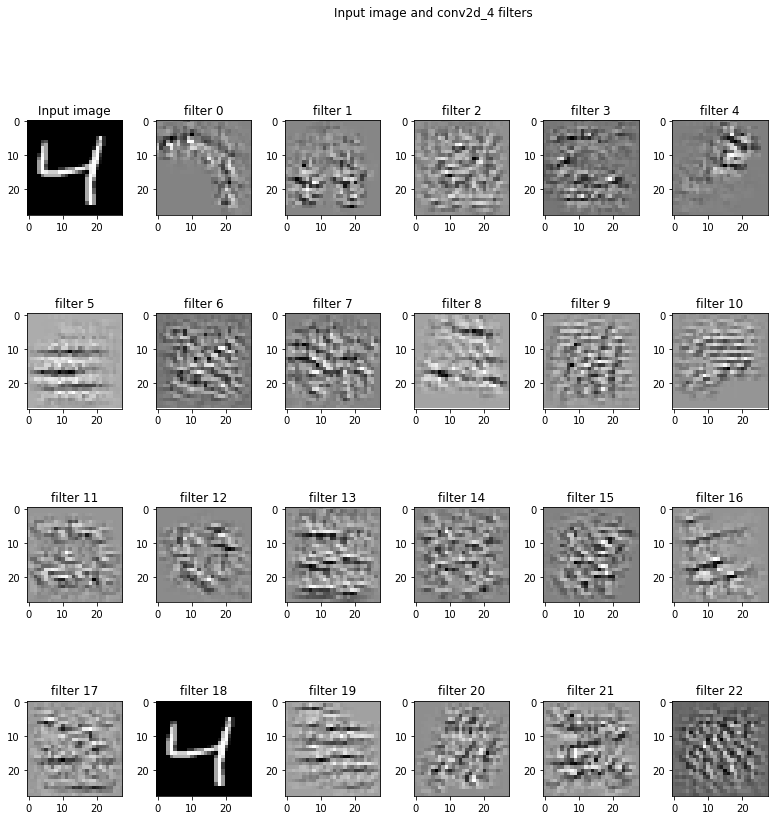

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()